# Proyek Analisis Data: (BIKE SHARING DATASET)
- **Nama:** Faishal Anwar Hasyim
- **Email:** anwarfaishal86@gmail.com
- **ID Dicoding:** anwarfaishal86

---
Data yang digunakan dapat diakses pada link [bike sharing dataset-kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data)

Data tersebut memiliki beberapa atribut:
*   instant: indeks tiap entri data
*   dteday: tanggal saat data diambil
*   season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin
*   yr: tahun (0: 2011, 1: 2012)
*   mnth: bulan (1 hingga 12)
*   hr: jam (0 hingga 23)
*   holiday: apakah data diambil ketika holiday atau tidak
*   weekday: hari dalam seminggu saat data diambil
*   workingday: hari kerja
*   weathersit: kondisi cuaca
    *  1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
    *  2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sebagian awan, Kabut
    *  3: Salju Ringan, Hujan Ringan + Badai petir + Awan berkepul-kepul, Hujan Ringan + Awan berkepul-kepul
    *  4: Hujan Lebat + Es butiran + Badai petir + Kabut, Salju + Kabut
*   temp: Suhu yang dinormalisasi dalam derajat Celsius
*   atemp: Suhu perasaan yang dinormalisasi dalam derajat Celsius
*   hum: Kelembaban yang dinormalisasi
*   windspeed: Kecepatan angin yang dinormalisasi
*   casual: Jumlah pengguna kasual
*   registered: Jumlah pengguna terdaftar
*   cnt: Jumlah total sepeda yang disewakan

## Menentukan Pertanyaan Bisnis

1. Berapa banyak orang yang menyewa sepeda, per jam, hari, bulan, dan tahun?

2. Apakah cuaca buruk mengurangi jumlah peminjaman?

3. Apakah ada peningkatan yang konsisten pada musim tertentu?

4. Apakah ada peningkatan atau penurunan yang signifikan selama hari libur?

5. Apa perbandingan antara pengguna terdaftar dan pengguna kasual dalam penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

- NumPy: Pustaka untuk operasi matematika dan manipulasi array multidimensi, menyediakan fungsi efisien untuk perhitungan numerik.

- Pandas: Pustaka untuk manipulasi dan analisis data, dengan struktur data seperti DataFrame untuk pengolahan data berbasis tabel.

- Matplotlib: Pustaka untuk membuat visualisasi data, menyediakan berbagai fungsi untuk membuat grafik dan plot.

- Seaborn: Pustaka untuk visualisasi statistik yang dibangun di atas Matplotlib, memudahkan pembuatan grafik yang lebih menarik dan kompleks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Kode dibawah ini membaca file CSV "hour.csv" ke dalam DataFrame hour_df menggunakan pandas, dan menampilkan lima baris pertama dari DataFrame tersebut dengan head(). Ini berguna untuk memeriksa struktur dan isi data sepeda.

In [2]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode dibawah ini membaca file CSV "hour.csv" ke dalam DataFrame hour_df menggunakan pandas, dan menampilkan lima baris pertama dari DataFrame tersebut dengan head(). Ini berguna untuk memeriksa struktur dan isi data sepeda.

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Perintah hour_df.info() digunakan untuk memberikan ringkasan informasi tentang DataFrame hour_df. Ini mencakup:

- Jumlah total entri (baris) dalam DataFrame.
- Jumlah kolom dan nama-nama kolom.
- Tipe data untuk setiap kolom (misalnya, integer, float, object).
- Jumlah nilai non-null di setiap kolom, yang membantu mengidentifikasi apakah ada data yang hilang.

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Perintah day_df.info() digunakan untuk memberikan ringkasan informasi tentang DataFrame day_df. Ini mencakup:

- Jumlah total entri (baris) dalam DataFrame.
- Jumlah kolom dan nama-nama kolom.
- Tipe data untuk setiap kolom (misalnya, integer, float, object).
- Jumlah nilai non-null di setiap kolom, yang membantu mengidentifikasi apakah ada data yang hilang.

**Insight:**

Terlihat pada informasi di atas bahwa `bike_hour_df` memiliki 17 kolom dengan jumlah barisnya 17379 yang bernilai non-null, serta tipe data `int64` sebanyak 12, `float64` sebanyak 4, dan `object` 1, sedangkan `bike_day_df` memiliki 16 kolom dengan jumlah barisnya 731 yang bernilai non-null, serta tipe data `int64` sebanyak 11, `float64` sebanyak 4, dan `object` 1.

Setelah mengetahui informasi tersebut, didapatkan beberapa kesalahan pada tipe data atribut `dteday` yang seharusnya bertipe data `datetime64`

### Cek missing Value dan duplikat

Perintah hour_df.isna().sum() digunakan untuk memeriksa jumlah nilai yang hilang (NaN) di setiap kolom dalam DataFrame hour_df.

In [6]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Perintah day_df.isna().sum() digunakan untuk memeriksa jumlah nilai yang hilang (NaN) di setiap kolom dalam DataFrame day_df.

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Perintah berikut digunakan untuk menghitung dan mencetak jumlah entri duplikat dalam dua DataFrame: hour_df dan day_df.



In [8]:
print("Jumlah duplikasi pada data rental per jam: ", hour_df.duplicated().sum())
print("Jumlah duplikasi pada data rental per hari: ", day_df.duplicated().sum())

Jumlah duplikasi pada data rental per jam:  0
Jumlah duplikasi pada data rental per hari:  0


**Insight:**
Berdaskan informasi diatas tidak ada missing value ataupun duplikat

### Cleaning Data

Data cleaning dilakukan untuk memperbaiki tipe data dari atribut `dteday` yang awalnya bertipe `object` menjadi `datetime64`. Proses ini dapat dilakukan menggunakan `function to_datetime()` yang disediakan oleh library `pandas`

Perintah berikut digunakan untuk mengonversi kolom dteday dalam DataFrame day_df dan hour_df menjadi format datetime menggunakan fungsi pd.to_datetime() dari pustaka Pandas.

In [9]:
day_df.dteday = pd.to_datetime(day_df.dteday)
hour_df.dteday = pd.to_datetime(hour_df.dteday)

Perintah dibawah digunakan untuk mengecek ulang dan memastikan bahwa kolomdteday telah berubah

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Perintah dibawah digunakan untuk mengecek ulang dan memastikan bahwa kolomdteday telah berubah

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight :** setelah merubah tipe tipe data, data menjadi lebih siap untuk dilakukan proses analisis di tahapan selanjutnya

## Exploratory Data Analysis (EDA)

Pada data yang saya gunakan terdapat keterangan pada masing-masing atribut yang dapat dilihat pada tabel di bawah:

|  Kolom Data  | Keterangan |
|--------------|------------|
| `season`     | Telah diubah dari data berjenis *string* menjadi data numerik melalui proses *label encoding*. |
| `yr`         | Telah diubah menjadi data numerik dengan urutan tahun melalui proses *ordinal encoding*. |
| `holiday`    | Telah diubah dari data bertipe *string* menjadi nilai *boolean* melalui proses *binary encoding*. |
| `weekday`    | Telah diubah menjadi data numerik dengan urutan hari melalui proses *ordinal encoding*. |
| `workingday` | Telah diubah dari data bertipe *string* menjadi nilai *boolean* melalui proses *label encoding*. |
| `weathersit` | Telah diubah dari tingkatan jenis cuaca yang awalnya bertipe *string* menjadi data numerik melalui proses *ordinal encoding*. |
| temp, atemp, hum, dan windspeed     | Telah mengalami normalisasi dengan pembagian nilainya menjadi nilai maksimum yang telah ditentukan. |


contoh : jika sebelum encodig data berupa nilai string seperti season : season (springer, summer, fall, winter), maka setelah encoding menjadi season : season (1, 2, 3, 4), hal ini dibutuhkan jika kita ingin melatih model pada machine learning, tetapi pada kasus kita, hanya kita akan menganalisis data, tentu kita akan merubah ulang data ke bentuk awal supaya memudahkan kita untuk menganalisis dan membuat visualisasi, pada proses selanjutnya kita akan merubah nilainya

### Explore ...

Perintah hour_df.describe(include="all") dalam Pandas digunakan untuk menghasilkan ringkasan statistik dari DataFrame hour_df. Berikut adalah penjelasan lebih detail tentang fungsi ini:

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Perintah day_df.describe(include="all") dalam Pandas digunakan untuk menghasilkan ringkasan statistik dari DataFrame day_df. Berikut adalah penjelasan lebih detail tentang fungsi ini:

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


kode dibawah digunakan untuk menyalin dataset supaya data yang asli tetap terjaga jika suatu saat kita memodifikasi data salinan untuk dilakukan analisis

In [14]:
copy_day_df = day_df.copy(deep=True)
copy_hour_df = hour_df.copy(deep=True)

**Insight:** kita menjadi tahu lebih dalam tentang data seperti nilai minimum, max dan sebagainya

## Visualization & Explanatory Analysis

Perintah berikan menggunakan metode .replace() dari Pandas untuk mengganti nilai-nilai dalam DataFrame copy_day_df dan copy_hour_df dengan nilai-nilai yang lebih deskriptif.

In [15]:
copy_day_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth' : {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',
             7:'Jul',8:'Agt',9:'Sept',10:'Okt',11:'Nov',12:'Des'},
    'holiday': {0: 'Not Holiday', 1: 'Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

copy_hour_df.replace({
    'season': {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: 2011, 1: 2012},
    'mnth' : {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Mei',6:'Jun',
              7:'Jul',8:'Agt',9:'Sept',10:'Okt',11:'Nov',12:'Des'},
    'holiday': {0: 'Holiday', 1: 'Not Holiday'},
    'workingday': {0: 'Holiday', 1: 'Working Day'},
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weathersit': {
        1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'
    }
}, inplace=True)

Kode bertujuan untuk memeriksa dan mencetak nilai unik dari kolom tertentu dalam dua DataFrame: copy_day_df dan copy_hour_df.

In [16]:
columns_to_check = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']

print('copy_day_df Unique Value')
for column in columns_to_check:
    unique_values = copy_day_df[column].unique()
    print(f'{column}: {unique_values}')

print('\ncopy_hour_df Unique Value')
for column in columns_to_check:
    unique_values = copy_hour_df[column].unique()
    print(f'{column}: {unique_values}')

copy_day_df Unique Value
season: ['Springer' 'Summer' 'Fall' 'Winter']
yr: [2011 2012]
mnth: ['Jan' 'Feb' 'Mar' 'Apr' 'Mei' 'Jun' 'Jul' 'Agt' 'Sept' 'Okt' 'Nov' 'Des']
holiday: ['Not Holiday' 'Holiday']
workingday: ['Holiday' 'Working Day']
weekday: ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit: ['Mist + Cloudy' 'Clear' 'Light Snow']

copy_hour_df Unique Value
season: ['Springer' 'Summer' 'Fall' 'Winter']
yr: [2011 2012]
mnth: ['Jan' 'Feb' 'Mar' 'Apr' 'Mei' 'Jun' 'Jul' 'Agt' 'Sept' 'Okt' 'Nov' 'Des']
holiday: ['Holiday' 'Not Holiday']
workingday: ['Holiday' 'Working Day']
weekday: ['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri']
weathersit: ['Clear' 'Mist + Cloudy' 'Light Snow' 'Heavy Rain']


Membuat list untuk setiap fitur numerik ataupun kategori

In [17]:
hour_categorical_features = ['season', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
hour_numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

day_categorical_features = ['season', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']
day_numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Kode ini memvisualisasikan distribusi fitur kategorikal (musim) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur pertama dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI SEASON PADA DATASET copy_hour_df===========
          jumlah sampel  persentase
season                             
Fall               4496        25.9
Summer             4409        25.4
Springer           4242        24.4
Winter             4232        24.4


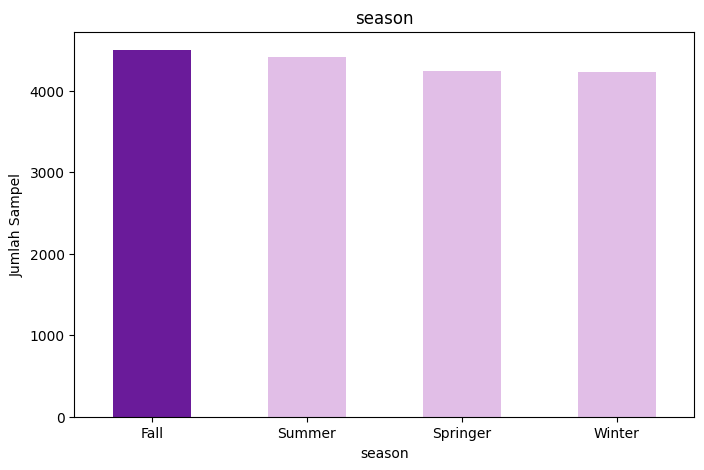

In [43]:
feature = hour_categorical_features[0]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI SEASON PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur kategorikal (bulan) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur kedua dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI MOUNT PADA DATASET copy_hour_df===========
      jumlah sampel  persentase
mnth                           
Mei            1488         8.6
Jul            1488         8.6
Des            1483         8.5
Agt            1475         8.5
Mar            1473         8.5
Okt            1451         8.3
Jun            1440         8.3
Apr            1437         8.3
Sept           1437         8.3
Nov            1437         8.3
Jan            1429         8.2
Feb            1341         7.7


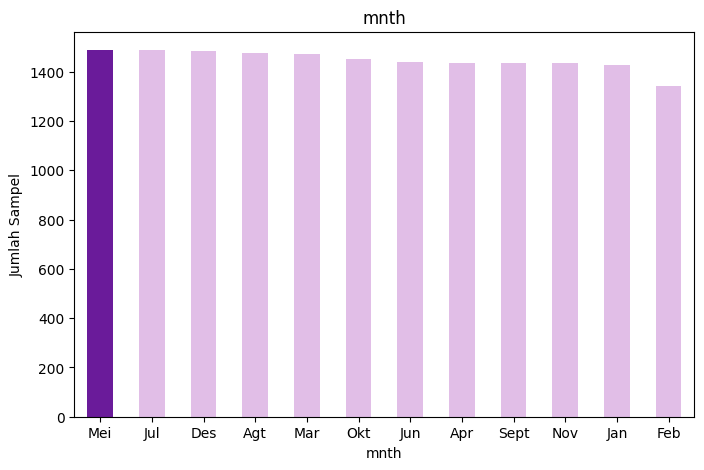

In [44]:
feature = hour_categorical_features[1]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI MOUNT PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur kategorikal (libur) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur ketiga dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI HOLIDAY PADA DATASET copy_hour_df===========
             jumlah sampel  persentase
holiday                               
Holiday              16879        97.1
Not Holiday            500         2.9


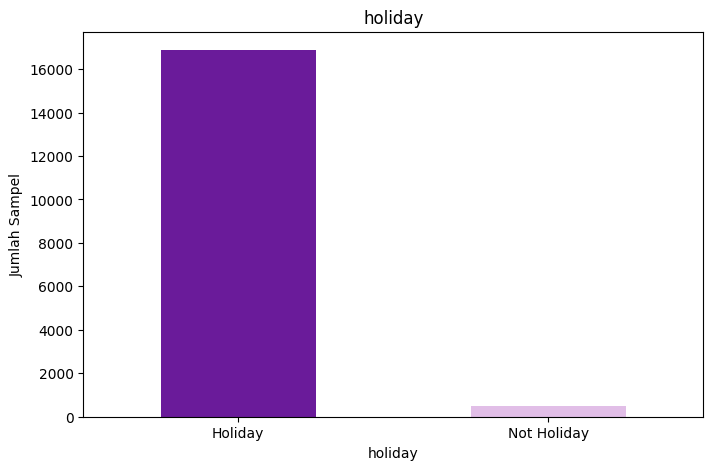

In [20]:
feature = hour_categorical_features[2]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI HOLIDAY PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur kategorikal (hari kerja) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur keempat dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI WORKING DAY PADA DATASET copy_hour_df===========
             jumlah sampel  persentase
workingday                            
Working Day          11865        68.3
Holiday               5514        31.7


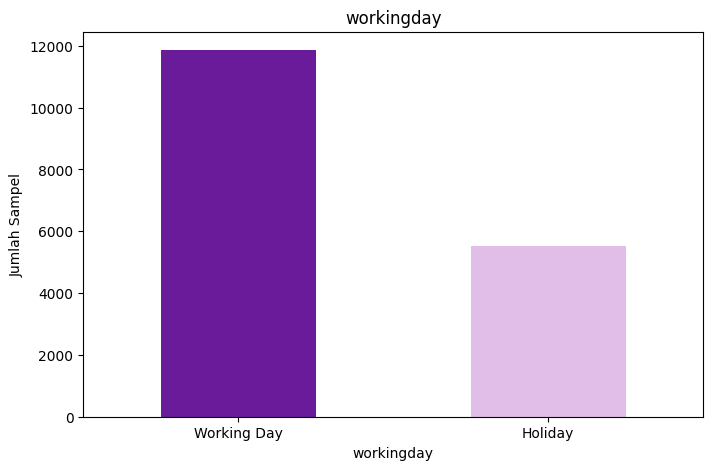

In [21]:
feature = hour_categorical_features[3]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI WORKING DAY PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur kategorikal (hari dalam seminggu) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur kelima dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI WEEK DAY PADA DATASET copy_hour_df===========
         jumlah sampel  persentase
weekday                           
Sat               2512        14.5
Sun               2502        14.4
Fri               2487        14.3
Mon               2479        14.3
Wed               2475        14.2
Thu               2471        14.2
Tue               2453        14.1


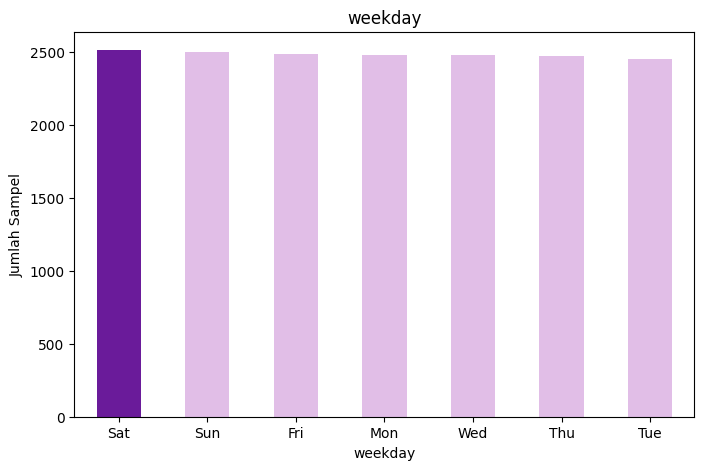

In [22]:
feature = hour_categorical_features[4]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI WEEK DAY PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur kategorikal (kondisi cuaca) dalam dataset copy_hour_df dengan langkah-langkah berikut:

1. Pemilihan Fitur: Memilih fitur keenam dari daftar hour_categorical_features.

2. Penghitungan Jumlah dan Persentase: Menghitung jumlah dan persentase kemunculan setiap kategori menggunakan value_counts().

3. Pencetakan Distribusi: Menyusun hasil dalam DataFrame yang berisi "jumlah sampel" dan "persentase", lalu mencetaknya.

4. Penentuan Warna: Membuat daftar warna untuk batang grafik, di mana batang kategori dengan jumlah tertinggi berwarna ungu gelap (#6A1B9A), dan lainnya ungu muda (#E1BEE7).

5. Pembuatan Grafik Batang: Menggunakan matplotlib untuk membuat grafik batang, dengan judul dan label sumbu yang jelas.

6. Menampilkan Grafik: Menampilkan grafik batang untuk visualisasi distribusi kategori.

==========DISTRIBUSI WEATHERSIT PADA DATASET copy_hour_df===========
               jumlah sampel  persentase
weathersit                              
Clear                  11413        65.7
Mist + Cloudy           4544        26.1
Light Snow              1419         8.2
Heavy Rain                 3         0.0


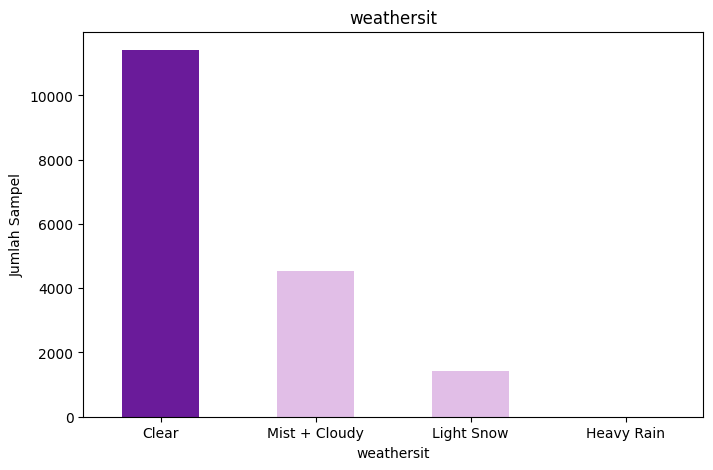

In [23]:
feature = hour_categorical_features[5]
count = copy_hour_df[feature].value_counts()
percent = 100 * copy_hour_df[feature].value_counts(normalize=True)

print("==========DISTRIBUSI WEATHERSIT PADA DATASET copy_hour_df===========")
df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

# Create a color list for the bars
colors = ['#6A1B9A' if i == count.idxmax() else '#E1BEE7' for i in count.index]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
count.plot(kind='bar', title=feature, color=colors)
plt.xlabel(feature)
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Kode ini memvisualisasikan distribusi fitur numerik dalam DataFrame copy_day_df menggunakan histogram. Berikut adalah langkah-langkah yang dilakukan:

1. Pengaturan Ukuran Gambar: Mengatur ukuran gambar untuk visualisasi dengan plt.figure(figsize=(20, 15)).

2. Loop Melalui Kolom Numerik: Menggunakan enumerate untuk mengiterasi setiap kolom numerik dalam DataFrame. Kolom numerik dipilih dengan select_dtypes(include=['float64', 'int64']).

3. Pembuatan Subplot: Untuk setiap kolom, subplot dibuat berdasarkan jumlah kolom numerik, dengan dua kolom per baris.

4. Penghitungan Nilai Paling Sering: Menggunakan mode() untuk mendapatkan nilai yang paling sering muncul dalam kolom saat ini.

5. Pembuatan Histogram: Menggunakan plt.hist() untuk membuat histogram dari kolom, dengan 50 bin, warna tepi hitam, dan transparansi 0.7.

6. Penyorotan Nilai Paling Sering: Mengubah warna batang histogram yang sesuai dengan nilai paling sering menjadi oranye, sementara batang lainnya berwarna biru muda.

7. Pengaturan Judul dan Label: Menambahkan judul, label sumbu x, dan label sumbu y untuk setiap subplot.

8. Penyesuaian Tata Letak: Menggunakan plt.tight_layout() untuk menyesuaikan tata letak agar tidak ada yang tumpang tindih.

9. Menampilkan Grafik: Menampilkan semua histogram yang telah dibuat.

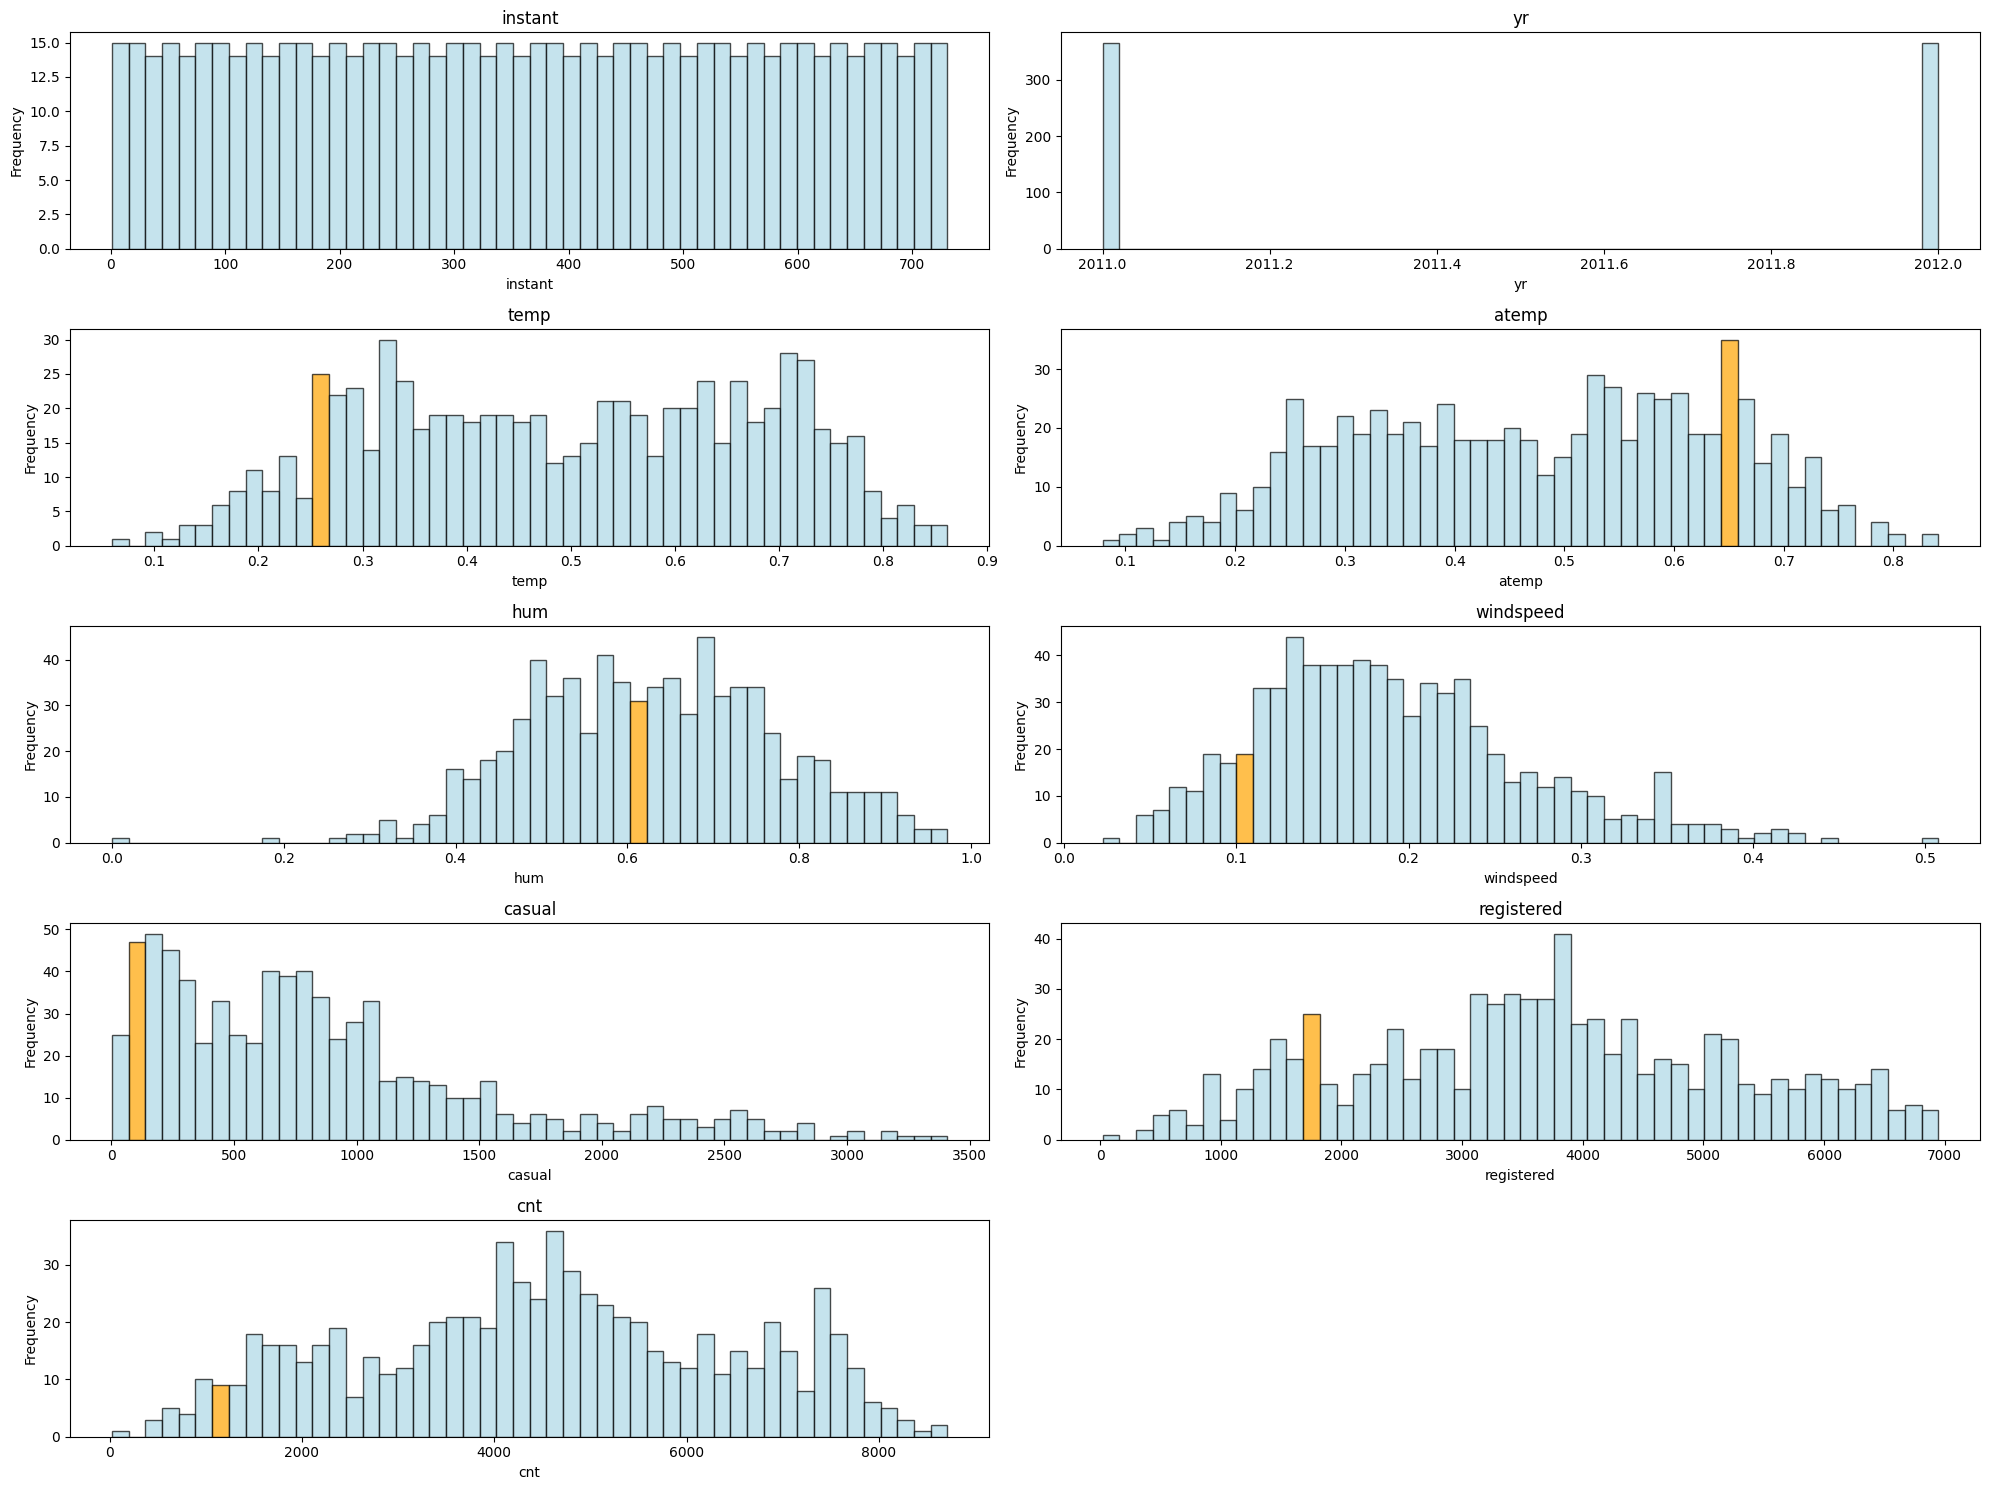

In [24]:
plt.figure(figsize=(20, 15))

# Ulangi setiap kolom numerik di DataFrame
for i, column in enumerate(copy_day_df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(len(copy_day_df.select_dtypes(include=['float64', 'int64']).columns) // 2 + 1, 2, i + 1)

    # Dapatkan nilai paling sering
    most_frequent_value = copy_day_df[column].mode()[0]

    # Create histogram
    counts, bins, patches = plt.hist(copy_day_df[column], bins=50, edgecolor='black', alpha=0.7)

    # Sorot bilah yang sesuai dengan nilai yang paling sering muncul
    for patch in patches:
        if patch.get_x() <= most_frequent_value < patch.get_x() + patch.get_width():
            patch.set_facecolor('orange')  # Ubah warna untuk nilai yang paling sering
        else:
            patch.set_facecolor('lightblue')  # Warna default untuk batang lainnya

    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # menyesuaikan tata letak untuk mencegah tumpang tindih
plt.show()

## **Pertanyaan 1 : Berapa banyak orang yang menyewa sepeda, per jam, hari, bulan, dan tahun?**

kode dibawah yang memvisualisasikan total sewa sepeda per jam dalam DataFrame copy_hour_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan jam (hr), dan total sewa sepeda (cnt) dihitung untuk setiap jam. Hasilnya disimpan dalam DataFrame baru yang menunjukkan total sewa sepeda per jam.

2. Identifikasi Jam dengan Sewa Maksimum: Dari DataFrame yang telah dibuat, jam di mana total sewa sepeda tertinggi diidentifikasi menggunakan fungsi idxmax().

3. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili jam dengan sewa maksimum diberi warna oranye, sementara batang lainnya diberi warna kuning muda.

4. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan jam dan sumbu y menunjukkan total sewa sepeda.

5. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

6. Rotasi Label Sumbu X: Label pada sumbu x diputar untuk meningkatkan keterbacaan, terutama jika ada banyak label jam.

7. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-25-dc3f4ace241c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='Total Sewa Sepeda', data=total_sewa_per_jam, palette=colors)


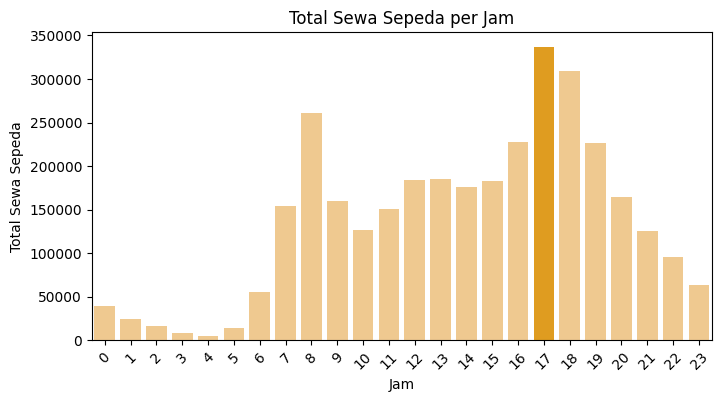

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data
total_sewa_per_jam = copy_hour_df.groupby('hr')['cnt'].sum().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

# Identifikasi jam dengan sewa maksimum
max_hour = total_sewa_per_jam.loc[total_sewa_per_jam['Total Sewa Sepeda'].idxmax(), 'hr']

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['orange' if hour == max_hour else '#FFCC80' for hour in total_sewa_per_jam['hr']]  # Light orange

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='hr', y='Total Sewa Sepeda', data=total_sewa_per_jam, palette=colors)
plt.title('Total Sewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Sewa Sepeda')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

kode dibawah memvisualisasikan total sewa sepeda per hari dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan hari dalam seminggu (weekday), dan total sewa sepeda (cnt) dihitung untuk setiap hari. Hasilnya disimpan dalam DataFrame baru yang menunjukkan total sewa sepeda per hari.

2. Identifikasi Hari dengan Sewa Maksimum: Dari DataFrame yang telah dibuat, hari di mana total sewa sepeda tertinggi diidentifikasi menggunakan fungsi idxmax().

3. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili hari dengan sewa maksimum diberi warna hijau (#4CAF50), sementara batang lainnya diberi warna hijau muda (#A5D6A7).

4. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan hari dan sumbu y menunjukkan total sewa sepeda.

5. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

6. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-26-a00fe1d30824>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='Total Sewa Sepeda', data=total_sewa_per_hari, palette=colors)


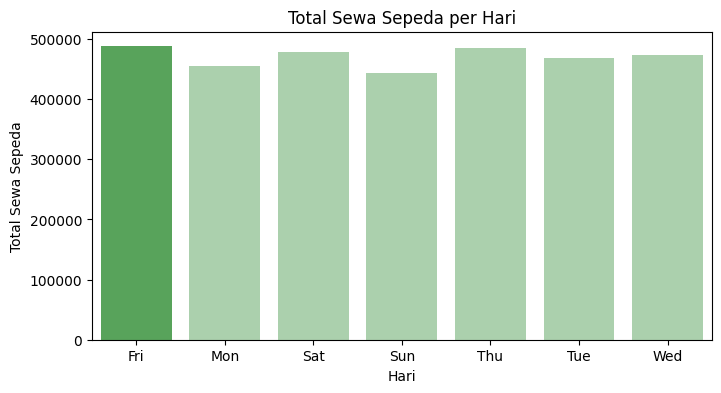

In [26]:
total_sewa_per_hari = copy_day_df.groupby('weekday')['cnt'].sum().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

# Identifikasi bulan dengan sewa maksimum
max_day = total_sewa_per_hari.loc[total_sewa_per_hari['Total Sewa Sepeda'].idxmax(), 'weekday']

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#4CAF50' if day == max_day else '#A5D6A7' for day in total_sewa_per_hari['weekday']]  # Green and light green

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='weekday', y='Total Sewa Sepeda', data=total_sewa_per_hari, palette=colors)
plt.title('Total Sewa Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Total Sewa Sepeda')
plt.show()

kode dibawah memvisualisasikan total sewa sepeda per bulan dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan bulan (mnth), dan total sewa sepeda (cnt) dihitung untuk setiap bulan. Hasilnya disimpan dalam DataFrame baru yang menunjukkan total sewa sepeda per bulan.

2. Identifikasi Bulan dengan Sewa Maksimum: Dari DataFrame yang telah dibuat, bulan di mana total sewa sepeda tertinggi diidentifikasi menggunakan fungsi idxmax().

3. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili bulan dengan sewa maksimum diberi warna biru tua (#2196F3), sementara batang lainnya diberi warna biru muda (#BBDEFB).

4. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan bulan dan sumbu y menunjukkan total sewa sepeda.

5. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

6. Rotasi Label Sumbu X: Label pada sumbu x diputar untuk meningkatkan keterbacaan, terutama jika ada banyak label bulan.

7. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-27-9da0a07b6d6c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='Total Sewa Sepeda', data=total_sewa_per_bulan, palette=colors)


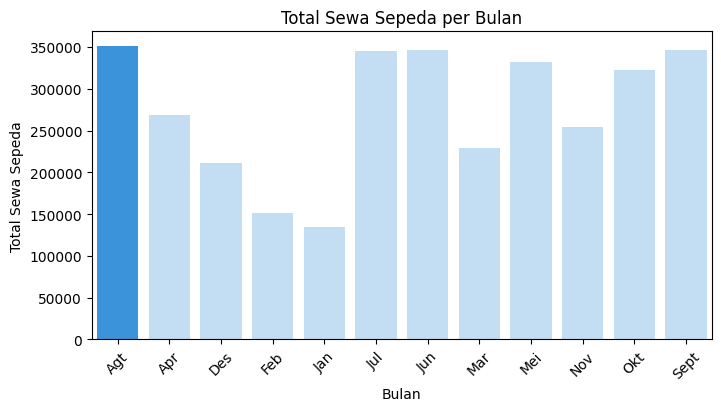

In [27]:
total_sewa_per_bulan = copy_day_df.groupby('mnth')['cnt'].sum().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

# Identifikasi bulan dengan sewa maksimum
max_month = total_sewa_per_bulan.loc[total_sewa_per_bulan['Total Sewa Sepeda'].idxmax(), 'mnth']

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#2196F3' if month == max_month else '#BBDEFB' for month in total_sewa_per_bulan['mnth']]  # Dark blue and light blue

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='mnth', y='Total Sewa Sepeda', data=total_sewa_per_bulan, palette=colors)
plt.title('Total Sewa Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa Sepeda')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

kode dibawah memvisualisasikan total sewa sepeda per tahun dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan tahun (yr), dan total sewa sepeda (cnt) dihitung untuk setiap tahun. Hasilnya disimpan dalam DataFrame baru yang menunjukkan total sewa sepeda per tahun.

2. Identifikasi Tahun dengan Sewa Maksimum: Dari DataFrame yang telah dibuat, tahun di mana total sewa sepeda tertinggi diidentifikasi menggunakan fungsi idxmax().

3. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili tahun dengan sewa maksimum diberi warna merah tua (#F44336), sementara batang lainnya diberi warna merah muda (#FFCDD2).

4. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan tahun dan sumbu y menunjukkan total sewa sepeda.

5. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

6. Format Sumbu Y: Sumbu y diformat untuk menampilkan angka dengan pemisah ribuan, sehingga lebih mudah dibaca.

7. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-28-60bd170822d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yr', y='Total Sewa Sepeda', data=total_sewa_per_tahun, palette=colors)


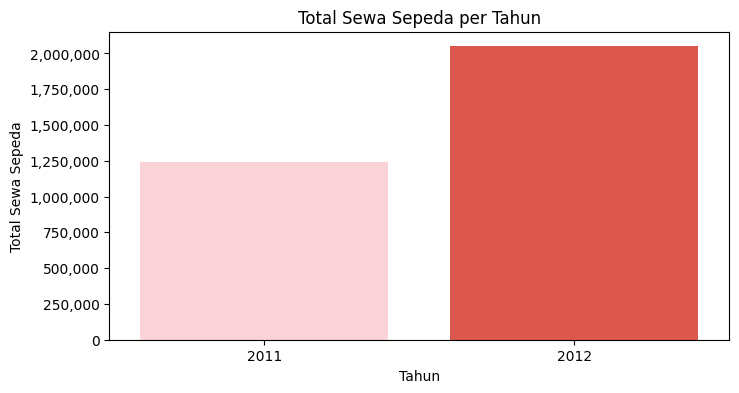

In [28]:
total_sewa_per_tahun = copy_day_df.groupby('yr')['cnt'].sum().reset_index().rename(columns={'cnt': 'Total Sewa Sepeda'})

# Identifikasi tahun dengan sewa maksimum
max_year = total_sewa_per_tahun.loc[total_sewa_per_tahun['Total Sewa Sepeda'].idxmax(), 'yr']

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#F44336' if year == max_year else '#FFCDD2' for year in total_sewa_per_tahun['yr']]  # Dark red and light red

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='yr', y='Total Sewa Sepeda', data=total_sewa_per_tahun, palette=colors)
plt.title('Total Sewa Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Sewa Sepeda')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))  # Format y-axis with commas

plt.show()

## **Pertanyaan 2 : Apakah cuaca buruk mengurangi jumlah peminjaman?**

kode dibawah memvisualisasikan pengaruh kondisi cuaca terhadap permintaan sepeda per hari dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan kondisi cuaca (weathersit), dan rata-rata permintaan sepeda (cnt) dihitung untuk setiap kondisi cuaca. Hasilnya disimpan dalam DataFrame baru yang menunjukkan rata-rata permintaan sepeda berdasarkan kondisi cuaca, diurutkan dari yang tertinggi ke terendah.

2. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili kondisi cuaca dengan rata-rata permintaan tertinggi diberi warna ungu tua (#6A1B9A), sementara batang lainnya diberi warna ungu muda (#E1BEE7).

3. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan kondisi cuaca dan sumbu y menunjukkan rata-rata permintaan sepeda.

4. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

5. Penyesuaian Label Sumbu X: Label pada sumbu x disesuaikan untuk menggambarkan kondisi cuaca dengan lebih jelas, menggunakan label yang lebih deskriptif seperti 'Clear', 'Mist + Cloudy', 'Light Snow', dan 'Heavy Rain'.

6. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-29-466e1c188636>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=cuaca_vs_permintaan_day, palette=colors)


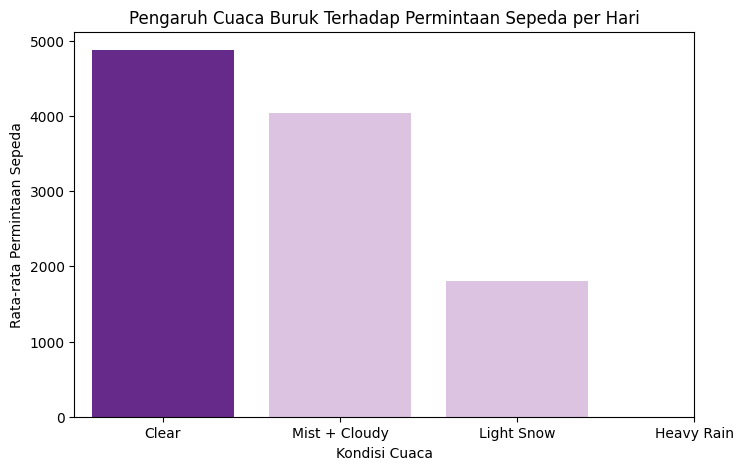

In [29]:
cuaca_vs_permintaan_day = copy_day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False).reset_index()

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#6A1B9A' if i == 0 else '#E1BEE7' for i in range(len(cuaca_vs_permintaan_day))]  # Dark purple and light purple

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=cuaca_vs_permintaan_day, palette=colors)
plt.title('Pengaruh Cuaca Buruk Terhadap Permintaan Sepeda per Hari')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'])
plt.show()

## **Pertanyaan 3 : Apakah ada peningkatan yang konsisten pada musim tertentu?**

kode dibawah memvisualisasikan tren musiman dalam penggunaan sepeda berdasarkan musim dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan musim (season), dan rata-rata permintaan sepeda (cnt) dihitung untuk setiap musim. Hasilnya disimpan dalam DataFrame baru yang menunjukkan rata-rata permintaan sepeda berdasarkan musim.

2. Penggantian Nama Kolom: Kolom cnt diubah namanya menjadi sum untuk mencerminkan bahwa nilai tersebut adalah rata-rata permintaan sepeda per musim.

3. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili musim dengan rata-rata permintaan tertinggi diberi warna pink tua (#D81B60), sementara batang lainnya diberi warna pink muda (#F8BBD0).

4. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan musim dan sumbu y menunjukkan rata-rata permintaan sepeda.

5. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.



<ipython-input-30-e2324303994f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='sum', data=rentals_per_season, palette=colors)


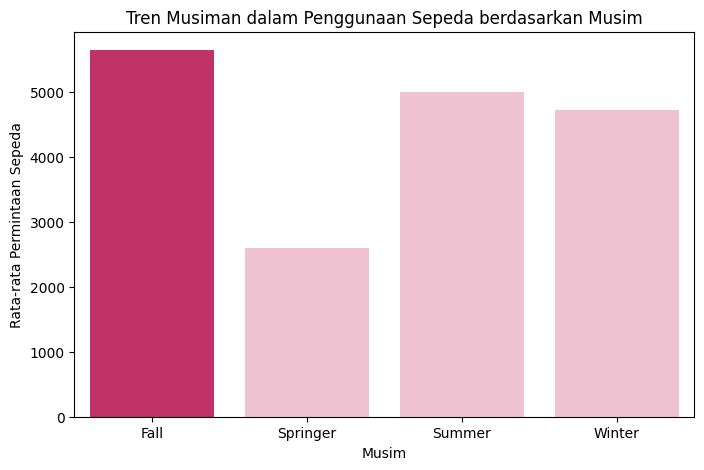

In [30]:
rentals_per_season = copy_day_df.groupby('season')['cnt'].mean().reset_index()
rentals_per_season.rename(columns={'cnt': 'sum'}, inplace=True)

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#D81B60' if i == rentals_per_season['sum'].idxmax() else '#F8BBD0' for i in range(len(rentals_per_season))]  # Dark pink and light pink

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='sum', data=rentals_per_season, palette=colors)
plt.title('Tren Musiman dalam Penggunaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.show()

## **Pertanyaan 4 : Apakah ada peningkatan atau penurunan yang signifikan selama hari libur?**

kode dibawah memvisualisasikan pengaruh hari libur terhadap penggunaan sepeda dalam DataFrame copy_day_df menggunakan grafik batang:

1. Pengelompokan Data: Data dikelompokkan berdasarkan status hari libur (holiday), dan rata-rata permintaan sepeda (cnt) dihitung untuk setiap kategori hari libur. Hasilnya disimpan dalam DataFrame baru yang menunjukkan rata-rata permintaan sepeda berdasarkan status hari libur.

2. Pembuatan Daftar Warna: Sebuah daftar warna dibuat untuk batang grafik, di mana batang yang mewakili status hari libur dengan rata-rata permintaan tertinggi diberi warna kuning cerah (#FFEB3B), sementara batang lainnya diberi warna kuning muda (#FFF9C4).

3. Pembuatan Grafik Batang: Grafik batang dibuat menggunakan seaborn, dengan sumbu x menunjukkan status hari libur dan sumbu y menunjukkan rata-rata permintaan sepeda.

4. Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

5. Menampilkan Grafik: Grafik batang yang telah dibuat ditampilkan kepada pengguna.

<ipython-input-31-3e4c96a3b9af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=average_rentals_on_holiday, palette=colors)


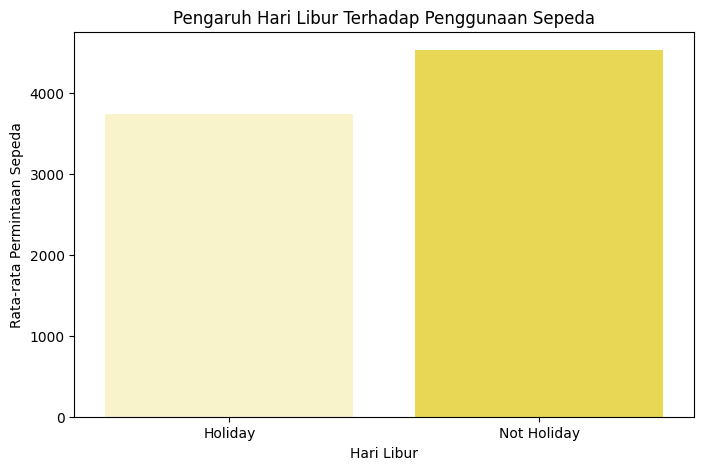

In [31]:
average_rentals_on_holiday = copy_day_df.groupby('holiday')['cnt'].mean().reset_index()

# Buat daftar warna di mana permintaan rata-rata maksimal disorot
colors = ['#FFEB3B' if i == average_rentals_on_holiday['cnt'].idxmax() else '#FFF9C4' for i in range(len(average_rentals_on_holiday))]  # Light pale yellow and standard yellow

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=average_rentals_on_holiday, palette=colors)
plt.title('Pengaruh Hari Libur Terhadap Penggunaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Permintaan Sepeda')
plt.show()

## **Pertanyaan 5 : Bagaimana perbandingan antara pengguna terdaftar dan pengguna kasual dalam penggunaan sepeda?**

kode dibawah memvisualisasikan perbandingan penggunaan sepeda oleh pengguna terdaftar dan kasual dalam DataFrame copy_hour_df menggunakan grafik garis:

1. Pengelompokan Data: Data dikelompokkan berdasarkan jam (hr) dan tahun (yr), dan rata-rata jumlah pengguna terdaftar (registered) dan kasual (casual) dihitung untuk setiap kombinasi jam dan tahun. Hasilnya disimpan dalam DataFrame baru yang menunjukkan rata-rata permintaan sepeda berdasarkan jam untuk kedua tipe pengguna.

2. Pembuatan Grafik Garis: Grafik garis dibuat menggunakan seaborn:

3. Garis pertama menggambarkan rata-rata permintaan sepeda oleh pengguna terdaftar dengan sumbu x menunjukkan jam dan sumbu y menunjukkan rata-rata permintaan.
Garis kedua menggambarkan rata-rata permintaan sepeda oleh pengguna kasual dengan sumbu x yang sama.
Pengaturan Judul dan Label: Judul grafik dan label untuk sumbu x dan sumbu y ditambahkan untuk memberikan konteks pada grafik.

4. Penambahan Legenda: Legenda ditambahkan untuk membedakan antara pengguna terdaftar dan kasual, dengan judul "Tipe Pengguna".

5. Menampilkan Grafik: Grafik garis yang telah dibuat ditampilkan kepada pengguna.

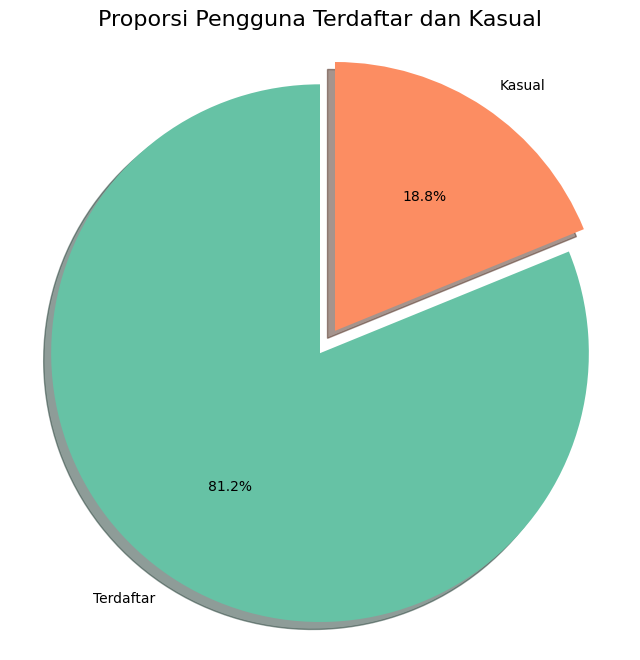

In [37]:
# Menghitung rata-rata pengguna terdaftar dan kasual
perbandingan_pengguna = copy_hour_df.groupby(['hr', 'yr'])[['registered', 'casual']].mean().reset_index()

# Menghitung total pengguna terdaftar dan kasual
total_pengguna = perbandingan_pengguna[['registered', 'casual']].sum()

# Membuat pie chart
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62']  # Warna yang lebih menarik
explode = (0.1, 0)  # Memisahkan bagian 'Terdaftar'

plt.pie(total_pengguna,
        labels=['Terdaftar', 'Kasual'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True)

plt.title('Proporsi Pengguna Terdaftar dan Kasual', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## Conclusion

## Pengaruh Cuaca terhadap Permintaan Sepeda
> Dalam analisis data sebelumnya, saya menemukan bahwa rata-rata permintaan sepeda mencapai puncaknya pada hari-hari dengan cuaca cerah. Ini menunjukkan bahwa kondisi cuaca yang baik cenderung meningkatkan minat masyarakat untuk menggunakan sepeda. Cuaca yang mendukung memberikan pengalaman berkendara yang lebih nyaman dan aman, yang mungkin menjadi faktor utama mengapa permintaan sepeda lebih tinggi pada hari-hari tersebut.

## Variasi Musiman dalam Penggunaan Sepeda
> Berdasarkan data yang tersedia mengenai musim, dapat disimpulkan bahwa permintaan sepeda paling tinggi terjadi selama musim gugur (Fall). Hal ini mungkin disebabkan oleh cuaca yang lebih nyaman dan meningkatnya aktivitas luar ruangan yang populer pada musim tersebut.

## Pengaruh Hari Libur terhadap Penggunaan Sepeda
> Dari hasil eksplorasi data, saya dapat menyimpulkan bahwa penggunaan sepeda cenderung lebih tinggi pada hari-hari yang bukan hari libur. Ini menunjukkan bahwa orang lebih suka menggunakan sepeda sebagai sarana transportasi pada hari kerja atau hari-hari biasa dibandingkan pada hari libur. Variasi ini dalam penggunaan sepeda dapat mempengaruhi kebijakan penyedia layanan sepeda, seperti jumlah sepeda yang tersedia atau penawaran promosi selama hari kerja untuk meningkatkan penggunaan sepeda.

## Perbandingan Penggunaan Sepeda oleh Pengguna Terdaftar dan Kasual
> Pengguna terdaftar cenderung lebih aktif dan konsisten dalam menyewa sepeda. Perbedaan ini mungkin menunjukkan bahwa pengguna terdaftar memiliki pola penggunaan yang lebih teratur dan terjadwal, sementara pengguna kasual lebih mungkin menggunakan sepeda secara sporadis atau sebagai wisatawan pada waktu tertentu.

Kode dibawah berfungsi untuk menyimpan DataFrame copy_day_df ke dalam file CSV dengan nama data_day.csv. Berikut adalah penjelasan langkah demi langkah tentang apa yang dilakukan oleh kode ini:

1. Penentuan Nama File: Variabel data_clean diatur untuk menyimpan nama file yang akan digunakan, yaitu 'data_day.csv'.

2. Menyimpan DataFrame ke CSV: Metode to_csv() dari DataFrame copy_day_df dipanggil untuk menyimpan data ke dalam file CSV. Parameter index=False digunakan untuk memastikan bahwa indeks DataFrame tidak disertakan dalam file CSV yang dihasilkan. Ini berarti hanya kolom data yang akan disimpan, tanpa kolom indeks yang biasanya ditambahkan oleh pandas.

3. Output: Setelah menjalankan kode ini, file data_day.csv akan dibuat di direktori kerja saat ini, berisi data dari DataFrame copy_day_df.

In [45]:
data_clean = 'data_hour.csv'
copy_hour_df.to_csv(data_clean, index=False)

Kode dibawah digunakan untuk mengunduh file yang telah disimpan ke dalam Google Colab. Berikut adalah penjelasan langkah demi langkah tentang apa yang dilakukan oleh kode ini:

1. Impor Modul: Baris pertama mengimpor modul files dari pustaka google.colab. Modul ini menyediakan fungsi untuk mengelola file dalam lingkungan Google Colab.

2. Mengunduh File: Fungsi files.download(data_clean) dipanggil untuk mengunduh file yang telah disimpan sebelumnya. Dalam hal ini, data_clean adalah nama file yang berisi 'data_day.csv'. Ketika fungsi ini dipanggil, browser Anda akan mulai mengunduh file tersebut.

3. Output: Setelah menjalankan kode ini, Anda akan melihat prompt di browser untuk mengunduh file data_day.csv ke komputer Anda.

In [46]:
from google.colab import files
files.download(data_clean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perintah pip freeze > requirements.txt digunakan untuk membuat file requirements.txt yang berisi daftar semua paket Python yang terinstal dalam lingkungan saat ini beserta versi mereka.

In [40]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy=